In [23]:
import os
import pydiva2d
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [31]:
datadir = "/home/ctroupin/Data/SeaDataCloud"
datafile = os.path.join(datadir, "ITS-90_water_temperature.19502015.0112.10003.10032.anl.nc")
outputdir = "/home/ctroupin/Presentations/PresentationsLatex/20180122_Eudat_Porto/data/"

In [3]:
nc = netCDF4.Dataset(datafile, "r")

In [5]:
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
depth = nc.variables['depth'][:]

In [8]:
temperature = nc.variables['ITS-90_water_temperature'][:]

In [9]:
temperature.shape

(1, 30, 128, 342)

In [10]:
T = temperature[0, -1, :, :]

In [14]:
field = pydiva2d.Diva2DResults()

In [16]:
field.x = lon
field.y = lat
field.analysis = T

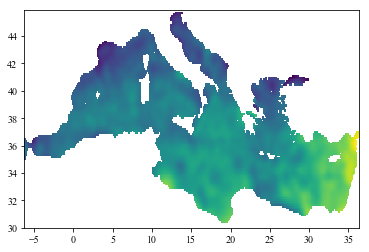

In [20]:
fig = plt.figure()
field.add_to_plot()
plt.show()

In [32]:
field.to_geojson(os.path.join(outputdir, "temperature.js"), 
                 varname="temperature5m", 
                 levels=np.arange(9., 25., .5))